# Pima Indian Diabetes data analysis

This notebook is to anayse the pima Indian diabetes data from Kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# import file
data = pd.read_csv('diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data visualization

In [3]:
# import module 
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80
plt.rcParams["font.size"] = "13"

import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

In [4]:
# check missing value
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Glucose, BloodPressure, SkinThickness, Insulin, BMI should not be zero, so replace zero with mean value


In [5]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## Filling missing value (zero) with the mean or median value

In [6]:
#replace zero with NaN and calculate the mean value
data_copy = data.copy()
data_copy[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [7]:
data_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
data_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

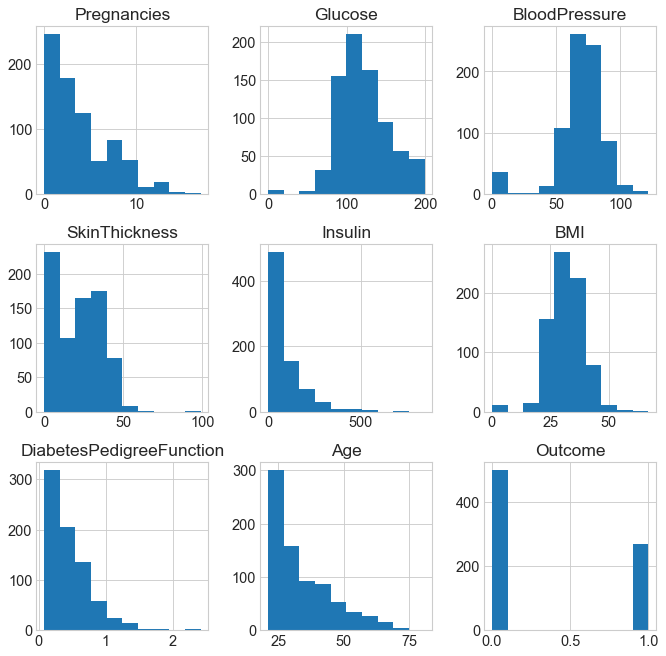

In [9]:
p = data.hist(figsize = (10,10))

In order to replace zero value, Glucose, BloodPressure use mean values and SkinThickness, Insulin, BMI use median values.

In [25]:
data_copy = data_copy.fillna(data.mean())
data_copy

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Age_bin  
0                       0.627   50        1        3  
1                       0.351   31        0        2  
2                       0.672   32        1        2  
3                       0.167   21        0        1  
4                       2.288   33        1        2  
..                        ...  ...      ...      ...  
763                     0.171   63        0        5  
764                     0.340   27        0        1  
765                     0.245   30        0        1  
766                     0.349   47        1        3  
767                     0.315   23        0        1  

[768 rows x 10 columns]

## Heat map

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

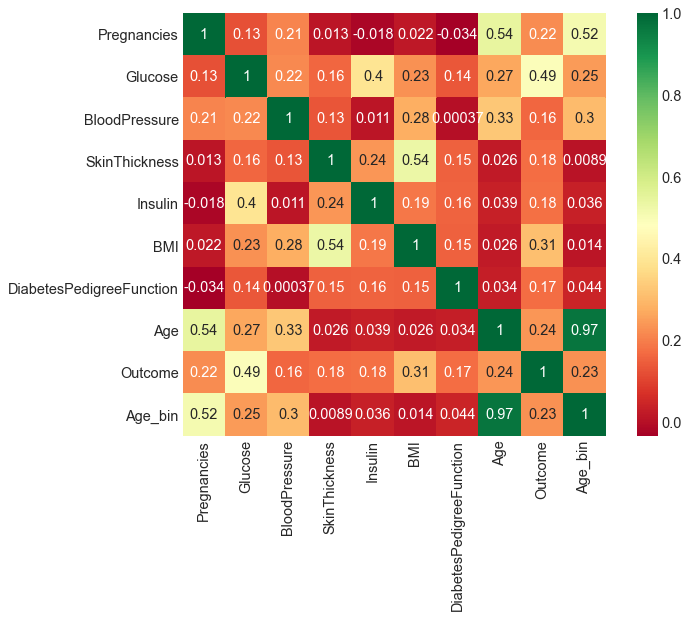

In [41]:
corrmat = data_copy.corr()
plt.figure(figsize=(10,7))
#sns.heatmap(corrmat, vmax=1, vmin = -1, square= True, annot= True,cmap ='RdYlGn')
sns.heatmap(corrmat, square= True, annot= True,cmap ='RdYlGn')
plt.show()

## Univariate Analysis

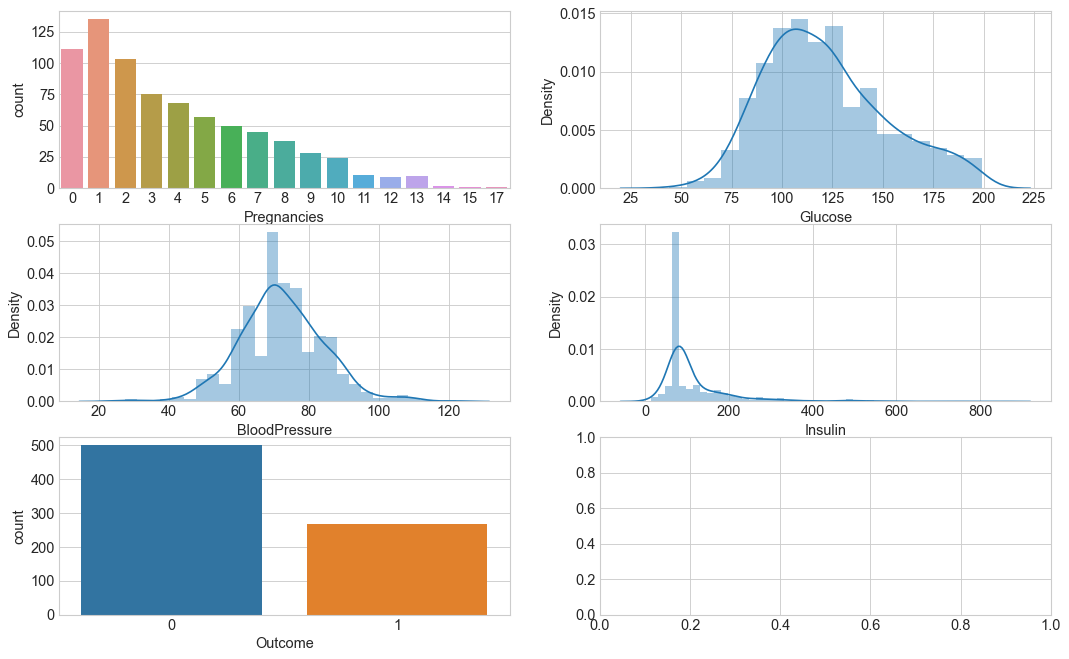

In [27]:
fig,ax = plt.subplots(3,2, figsize = (16,10))
sns.countplot('Pregnancies', data = data_copy, ax = ax[0][0])
sns.distplot(data_copy['Glucose'],kde=True,ax=ax[0][1])
sns.distplot(data_copy['BloodPressure'],kde=True,ax=ax[1][0])
sns.distplot(data_copy['Insulin'],kde=True,ax=ax[1][1])
sns.countplot('Outcome', data = data_copy, ax = ax[2][0])
plt.ioff()

he data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

In [28]:
data_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  768.000000                768.000000  768.000000  768.000000   
mean    32.450805                  0.471876   33.240885    0.348958   
std      6.875374                  0.331329   11.760232    0.476951   
min     18.200000                  0.078000   21.000000    0.000000   
25%     27.500000                  0.243750   24.000000    0.000000   
50%     32.000000                  0.372500   29.000000    0.000000   
75%     36.600000                  0.626250   41.000000    1.000000   
max     67.100000                  2.420000   81.000000    1.000000   

          Age_bin  
count  768.000000  
mean     1.852865  
std      1.134026  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      3.000000  
max      6.000000

   ## Diabetes by Age distribution

In [15]:
print('Oldest women who has diabetes was of:',data.Age[data.Outcome == 1].max(),'Years')
print('Youngest women who has diabetes was of:',data.Age[data.Outcome == 1].min(),'Years')
print('Average Age on diabetes women:',data.Age[data.Outcome == 1].mean(),'Years')

Oldest women who has diabetes was of: 70 Years
Youngest women who has diabetes was of: 21 Years
Average Age on diabetes women: 37.06716417910448 Years


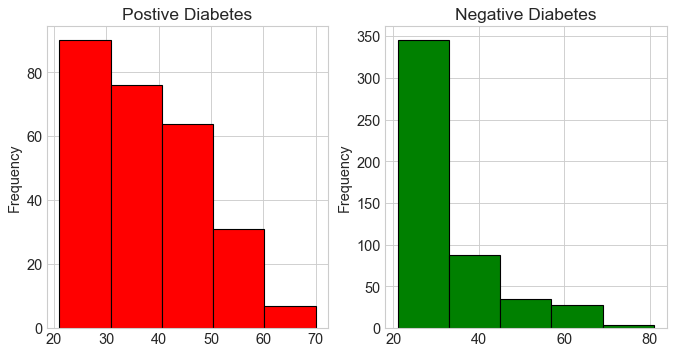

In [35]:
plt.style.use('seaborn-whitegrid')
f,ax = plt.subplots(1,2, figsize = (10,5))
data_copy[data_copy.Outcome == 1].Age.plot.hist( ax = ax[0], bins = 5, edgecolor = 'black', color = 'red')
ax[0].set_title("Postive Diabetes")
data_copy[data_copy.Outcome == 0].Age.plot.hist( ax = ax[1], bins = 5, edgecolor = 'black', color = 'green')
ax[1].set_title("Negative Diabetes")
plt.show()

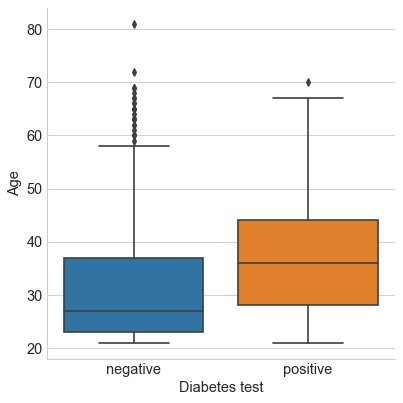

In [39]:
# Box plot for diabetes vs age
b = sns.catplot(x = 'Outcome', y = 'Age', data = data_copy, kind = 'box')
b.set_xticklabels(['negative','positive'])
b.set_xlabels('Diabetes test')
pass

From the box plot we can conclude the average age of women with positive diabetes are older than that of negative diabetes women.

### Age binning
bin(0): Age <= 20, 
bin(1): 20 < Age <=30, 
bin(2): 30 < Age <= 40,
bin(3): 40 < Age <= 50,
bin(4): 50 < Age <= 60,
bin(5): 60 < Age <= 70,
bin(6): Age >= 70

In [17]:
data_copy['Age_bin'] = 0
data_copy.loc[ (data_copy.Age > 20) & (data_copy.Age <=30),'Age_bin'] = 1
data_copy.loc[ (data_copy.Age > 30) & (data_copy.Age <=40),'Age_bin'] = 2
data_copy.loc[ (data_copy.Age > 40) & (data_copy.Age <=50),'Age_bin'] = 3
data_copy.loc[ (data_copy.Age > 50) & (data_copy.Age <=60),'Age_bin'] = 4
data_copy.loc[ (data_copy.Age > 60) & (data_copy.Age <=70),'Age_bin'] = 5
data_copy.loc[data_copy.Age > 70,'Age_bin']=6

In [18]:
#data_copy.Age_bin.value_counts().to_frame().style.background_gradient(cmap='summer')
Age_df = data_copy.Age_bin.value_counts().to_frame()

Age_df['Age range'] = [ '20 < Age <= 30',
                       '30 < Age <= 40',
                       '40 < Age <= 50',
                       '50 < Age <= 60',
                       '60 < Age <= 70',
                       '> 70']
Age_df.style.background_gradient(cmap='summer')


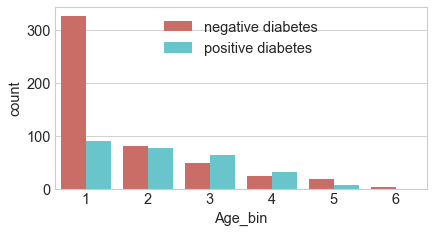

In [32]:
sns.countplot(x = 'Age_bin', data = data_copy, palette = 'hls', hue='Outcome')
plt.legend(["negative diabetes", "positive diabetes"])
plt.show()

# Model build
We use machine learning techniques to predict who has diabetes. We will try different algorithms for prediction. The following algorithms will be used in this prediction.
1. Logistic regression
2. Support vector machine
3. Random forest
4. KNN
5. Naive Bayes
6. Decision Tree

In [20]:
# importing module for ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

## Creating matrix of features

In [30]:
X = data_copy.drop(labels='Outcome',axis=1)
y = data_copy['Outcome']

In [31]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Age_bin  
0                       0.627   50        3  
1                       0.351   31        2  
2                       0.672   32        2  
3                       0.167   21        1  
4                       2.288   33        2  
..                        ...  ...      ...  
763                     0.171   63        5  
764                     0.340   27        1  
765                     0.245   30        1  
766                     0.349   47        3  
767                     0.315   23        1  

[768 rows x 9 columns]

### Dropping unwanted columns that will not use for prediction

In [ ]:
data_copy.drop(['Age']) # we use Age_bin for the model